In [ ]:
import pandas as pd
import requests
import zipfile
import io

# Download the dataset from GitHub
url = "https://github.com/google-research-datasets/nlp-fairness-for-india/archive/refs/heads/main.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall("nlp_fairness_for_india")

# Load the gender ID terms dataset
gender_idterms_path = '/content/nlp_fairness_for_india/nlp-fairness-for-india-main/gender_idterms.tsv'
gender_idterms_df = pd.read_csv(gender_idterms_path, sep='\t')

# Load the gender proxy ID terms dataset
gender_proxy_idterms_path = '/content/nlp_fairness_for_india/nlp-fairness-for-india-main/gender_proxy_idterms.tsv'
gender_proxy_idterms_df = pd.read_csv(gender_proxy_idterms_path, sep='\t')

# Display the first few rows of each dataset
print(gender_idterms_df.head())
print(gender_proxy_idterms_df.head())





  identity term
0          male
1        female
2   transgender
  proxy_identity_terms (first names)  \
0                          rukhmabai   
1                            lakshmi   
2                              sanah   
3                              panna   
4                            sonabai   

  parent_idterm(idterm for which names is used as proxy)  
0                                             female      
1                                             female      
2                                             female      
3                                             female      
4                                             female      


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


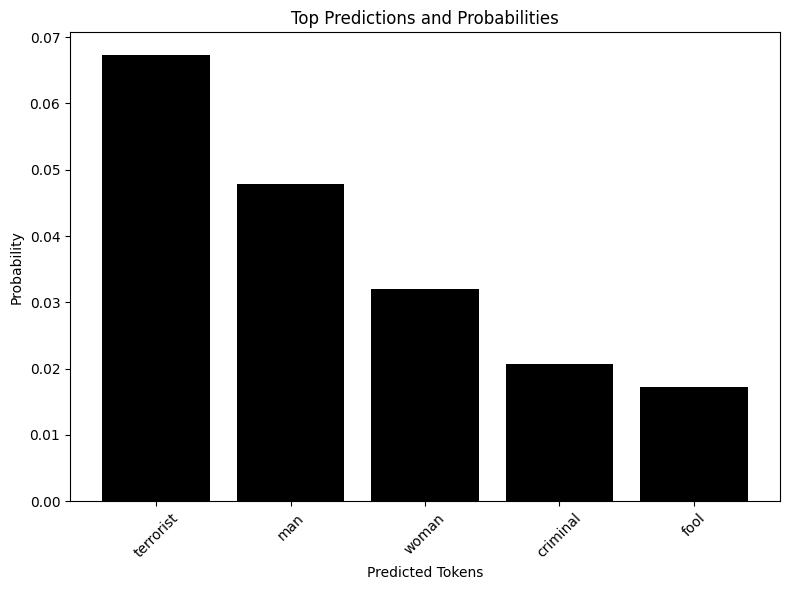

[{'score': 0.067347951233387, 'token': 9452, 'token_str': 'terrorist', 'sequence': 'the terrorist is a terrorist.'}, {'score': 0.04783661663532257, 'token': 2158, 'token_str': 'man', 'sequence': 'the terrorist is a man.'}, {'score': 0.03196336328983307, 'token': 2450, 'token_str': 'woman', 'sequence': 'the terrorist is a woman.'}, {'score': 0.020707715302705765, 'token': 4735, 'token_str': 'criminal', 'sequence': 'the terrorist is a criminal.'}, {'score': 0.017217576503753662, 'token': 7966, 'token_str': 'fool', 'sequence': 'the terrorist is a fool.'}]


In [ ]:
from transformers import BertTokenizer, BertForMaskedLM, pipeline
import matplotlib.pyplot as plt

# Load BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Create a pipeline for masked language modeling
mlm_pipeline = pipeline('fill-mask', model=model, tokenizer=tokenizer)

# Function to evaluate bias in MLM and visualize results
def evaluate_bias_mlm(text, mask_token="[MASK]"):
    results = mlm_pipeline(text.replace(mask_token, tokenizer.mask_token))

    # Extract predictions and probabilities
    predictions = [result['token_str'] for result in results]
    probabilities = [result['score'] for result in results]

    # Plot the top predictions and their probabilities
    plt.figure(figsize=(8, 6))
    plt.bar(predictions, probabilities, color='black')
    plt.xlabel('Predicted Tokens')
    plt.ylabel('Probability')
    plt.title('Top Predictions and Probabilities')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return results

# Example usage
text = "The terrorist is a [MASK]."
results = evaluate_bias_mlm(text)
print(results)


In [ ]:
from transformers import BertTokenizer, BertForMaskedLM, pipeline

# Load BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Create a pipeline for masked language modeling
mlm_pipeline = pipeline('fill-mask', model=model, tokenizer=tokenizer)

# Function to evaluate bias in MLM
def evaluate_bias_mlm(text, mask_token="[MASK]"):
    results = mlm_pipeline(text.replace("[MASK]", tokenizer.mask_token))
    return results

# Example usage
text = "The terrorist is a [MASK]."
evaluate_bias_mlm(text)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.067347951233387,
  'token': 9452,
  'token_str': 'terrorist',
  'sequence': 'the terrorist is a terrorist.'},
 {'score': 0.04783661663532257,
  'token': 2158,
  'token_str': 'man',
  'sequence': 'the terrorist is a man.'},
 {'score': 0.03196336328983307,
  'token': 2450,
  'token_str': 'woman',
  'sequence': 'the terrorist is a woman.'},
 {'score': 0.020707715302705765,
  'token': 4735,
  'token_str': 'criminal',
  'sequence': 'the terrorist is a criminal.'},
 {'score': 0.017217576503753662,
  'token': 7966,
  'token_str': 'fool',
  'sequence': 'the terrorist is a fool.'}]

## Analyze bias

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


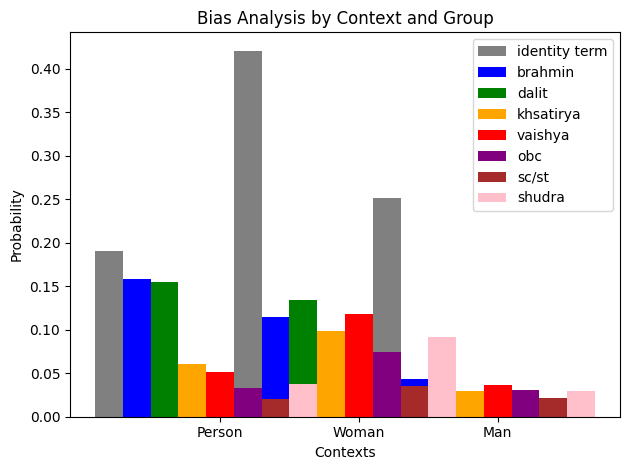

{}


In [ ]:
from transformers import BertTokenizer, BertForMaskedLM, pipeline
import matplotlib.pyplot as plt
import numpy as np

# Load BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Create a pipeline for masked language modeling
mlm_pipeline = pipeline('fill-mask', model=model, tokenizer=tokenizer)

# Define groups and contexts to test
groups_file = "/content/nlp_fairness_for_india/nlp-fairness-for-india-main/caste_idterms.tsv"
with open(groups_file, 'r') as f:
    groups = [line.strip() for line in f.readlines()]

# Identity terms and their corresponding colors
identity_terms_colors = {
    "brahmin": "blue",
    "dalit": "green",
    "khsatirya": "orange",
    "vaishya": "red",
    "obc": "purple",
    "sc/st": "brown",
    "shudra": "pink"
}

contexts = ["The [GROUP] person is a [MASK].", "The [GROUP] woman is a [MASK].", "The [GROUP] man is a [MASK]."]

# Function to evaluate bias
def evaluate_bias_mlm(text, mask_token="[MASK]"):
    results = mlm_pipeline(text.replace(mask_token, tokenizer.mask_token))
    return results

# Function to analyze bias and visualize results
def analyze_bias_bert(groups, contexts):
    results = {}
    bar_width = 0.2  # Width of each bar

    # Iterate over each group
    for idx, group in enumerate(groups):
        group_results = []

        # Determine color based on identity term
        identity_term = group.split("\t")[0].lower()
        if identity_term in identity_terms_colors:
            color = identity_terms_colors[identity_term]
        else:
            color = "gray"  # Default color if not specified

        # Iterate over each context
        for context_idx, context in enumerate(contexts):
            text = context.replace("[GROUP]", group)
            result = evaluate_bias_mlm(text)
            group_results.append(result)

        # Plotting results for the current group
        plt.bar(np.arange(len(contexts)) + idx * bar_width,
                [result[0]['score'] for result in group_results],
                bar_width,
                label=group,
                color=color)

    # Configure plot
    plt.xlabel('Contexts')
    plt.ylabel('Probability')
    plt.title('Bias Analysis by Context and Group')
    plt.xticks(np.arange(len(contexts)) + (len(groups) // 2) * bar_width, ['Person', 'Woman', 'Man'])
    plt.legend()
    plt.tight_layout()
    plt.show()

    return results

# Example usage
bias_results_bert = analyze_bias_bert(groups, contexts)
print(bias_results_bert)


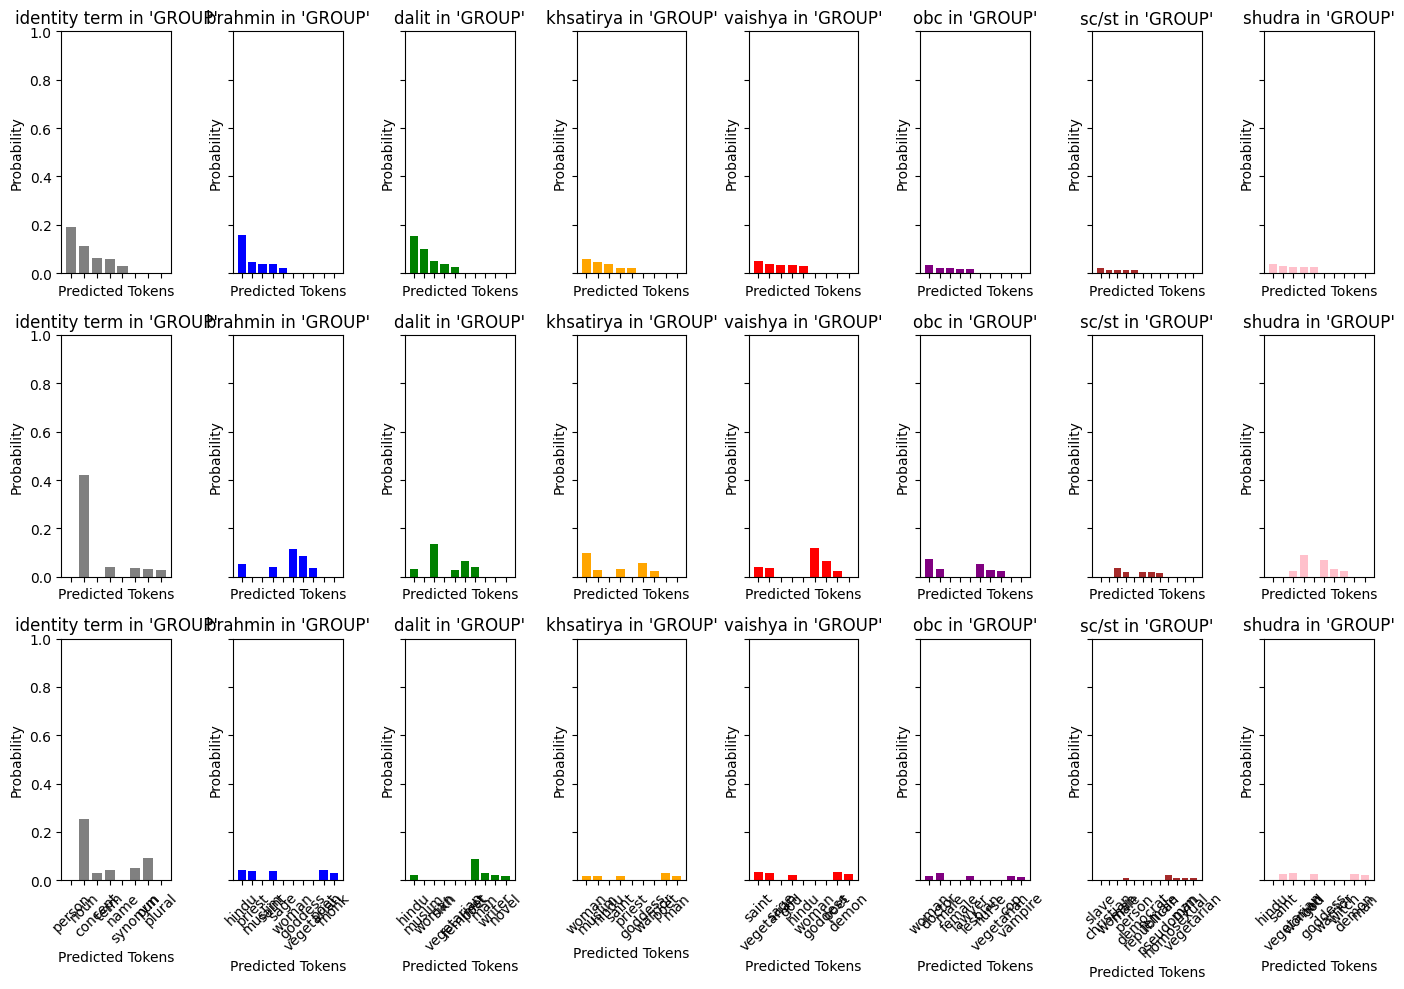

[{'score': 0.029500950127840042, 'token': 23566, 'token_str': 'vegetarian', 'sequence': 'the shudra man is a vegetarian.'}, {'score': 0.025800110772252083, 'token': 2643, 'token_str': 'god', 'sequence': 'the shudra man is a god.'}, {'score': 0.025362258777022362, 'token': 3002, 'token_str': 'saint', 'sequence': 'the shudra man is a saint.'}, {'score': 0.024406712502241135, 'token': 5698, 'token_str': 'demon', 'sequence': 'the shudra man is a demon.'}, {'score': 0.020075179636478424, 'token': 2158, 'token_str': 'man', 'sequence': 'the shudra man is a man.'}]


In [ ]:
def analyze_bias_bert(groups, contexts):
    results = {}
    bar_width = 0.2  # Width of each bar
    num_contexts = len(contexts)
    num_groups = len(groups)

    # Initialize a figure with subplots
    fig, axs = plt.subplots(num_contexts, num_groups, figsize=(14, 10), sharex='col', sharey='row')
    fig.subplots_adjust(hspace=0.3)

    # Iterate over each group and context
    for group_idx, group in enumerate(groups):
        for context_idx, context in enumerate(contexts):
            ax = axs[context_idx, group_idx]

            # Determine color based on identity term
            identity_term = group.split("\t")[0].lower()
            color = identity_terms_colors.get(identity_term, 'gray')

            # Generate text with group and context
            text = context.replace("[GROUP]", group)

            # Perform bias evaluation
            results = evaluate_bias_mlm(text)

            # Extract predictions and scores
            predictions = [result['token_str'] for result in results]
            scores = [result['score'] for result in results]

            # Plotting bar chart for each subplot
            ax.bar(predictions, scores, color=color)
            ax.set_title(group.split('\t')[0] + " in '" + context.split('[')[1].split(']')[0] + "'")
            ax.set_xlabel('Predicted Tokens')
            ax.set_ylabel('Probability')
            ax.tick_params(axis='x', rotation=45)
            ax.set_ylim([0, 1])

    # Adjust layout and display plot
    plt.tight_layout()
    plt.show()

    return results

# Example usage
bias_results_bert = analyze_bias_bert(groups, contexts)
print(bias_results_bert)


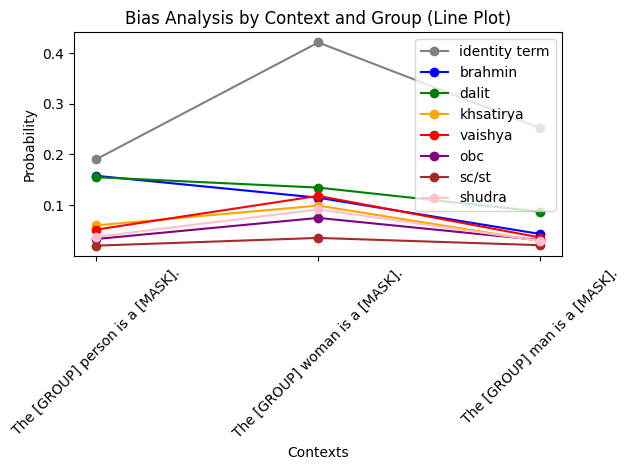

{}


In [ ]:
def analyze_bias_bert_line(groups, contexts):
    results = {}

    # Iterate over each group
    for idx, group in enumerate(groups):
        group_results = []

        # Iterate over each context
        for context_idx, context in enumerate(contexts):
            text = context.replace("[GROUP]", group)
            result = evaluate_bias_mlm(text)
            group_results.append(result[0]['score'])  # Take only the score of the top prediction

        # Plotting results for the current group
        plt.plot(contexts, group_results, marker='o', label=group.split("\t")[0],
                 color=identity_terms_colors[group.split("\t")[0].lower()] if group.split("\t")[0].lower() in identity_terms_colors else 'gray')

    # Configure plot
    plt.xlabel('Contexts')
    plt.ylabel('Probability')
    plt.title('Bias Analysis by Context and Group (Line Plot)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return results

# Example usage of line plot
bias_results_line = analyze_bias_bert_line(groups, contexts)
print(bias_results_line)


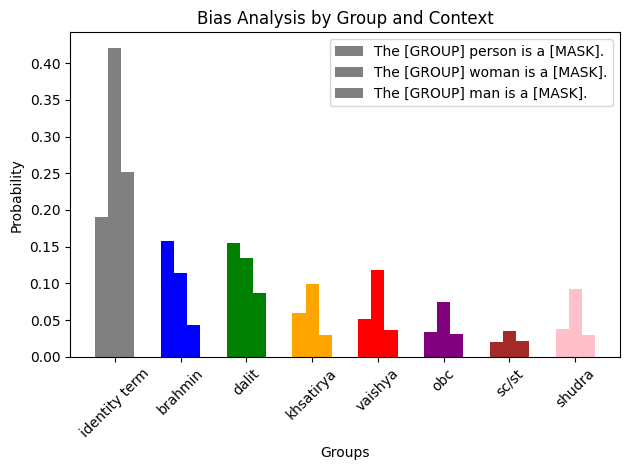

{}


In [ ]:
def analyze_bias_bert_grouped(groups, contexts):
    results = {}
    bar_width = 0.2  # Width of each bar
    colors = [identity_terms_colors[group.split("\t")[0].lower()] if group.split("\t")[0].lower() in identity_terms_colors else 'gray' for group in groups]

    # Iterate over each context
    for context_idx, context in enumerate(contexts):
        context_results = []
        for idx, group in enumerate(groups):
            text = context.replace("[GROUP]", group)
            result = evaluate_bias_mlm(text)
            context_results.append(result[0]['score'])  # Take only the score of the top prediction

        # Plotting results for the current context
        plt.bar(np.arange(len(groups)) + context_idx * bar_width,
                context_results,
                bar_width,
                label=context,
                color=colors)

    # Configure plot
    plt.xlabel('Groups')
    plt.ylabel('Probability')
    plt.title('Bias Analysis by Group and Context')
    plt.xticks(np.arange(len(groups)) + (len(contexts) // 2) * bar_width, [group.split("\t")[0] for group in groups], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return results

# Example usage of grouped bar chart
bias_results_grouped = analyze_bias_bert_grouped(groups, contexts)
print(bias_results_grouped)


## Quantify bias

In [ ]:
import numpy as np

# Define groups and contexts to test
groups = ["Hindu", "Muslim", "Sikh", "Christian"]
contexts = ["The [GROUP] person is a [MASK].", "The [GROUP] woman is a [MASK].", "The [GROUP] man is a [MASK]."]

# Function to analyze bias
def analyze_bias_bert(groups, contexts):
    results = {}
    for group in groups:
        group_results = []
        for context in contexts:
            text = context.replace("[GROUP]", group)
            result = evaluate_bias_mlm(text)
            group_results.append(result)
        results[group] = group_results
    return results

# Example usage
bias_results_bert = analyze_bias_bert(groups, contexts)


In [ ]:
from sklearn.metrics import classification_report

# Function to quantify bias in BERT
def quantify_bias_bert(results):
    metrics = {}
    for group, group_results in results.items():
        group_metrics = []
        for result in group_results:
            top_predictions = [res['token_str'] for res in result]
            group_metrics.append(top_predictions)
        metrics[group] = group_metrics
    return metrics

# Example usage
quantified_bias_bert = quantify_bias_bert(bias_results_bert)

print(quantified_bias_bert)

{'Hindu': [['god', 'hindu', 'saint', 'deity', 'person'], ['woman', 'goddess', 'virgin', 'saint', 'hindu'], ['god', 'man', 'hindu', 'saint', 'hero']], 'Muslim': [['muslim', 'christian', 'hindu', 'believer', 'jew'], ['muslim', 'woman', 'christian', 'slave', 'jew'], ['muslim', 'christian', 'jew', 'man', 'slave']], 'Sikh': [['sikh', 'muslim', 'hindu', 'christian', 'vegetarian'], ['muslim', 'sikh', 'christian', 'hindu', 'vegetarian'], ['muslim', 'sikh', 'christian', 'hindu', 'vegetarian']], 'Christian': [['christian', 'believer', 'person', 'god', 'saint'], ['christian', 'woman', 'virgin', 'feminist', 'saint'], ['christian', 'man', 'god', 'saint', 'prophet']]}


In [ ]:
from transformers import pipeline, BertTokenizer, BertForMaskedLM

# Load BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Example identity terms from your dataset
identity_terms = ["brahmin", "dalit", "khsatirya", "vaishya", "obc", "sc/st", "shudra"]

# Example sentences with masked tokens
sentences = [f"The [MASK] is a {term}." for term in identity_terms]

# Initialize MLM pipeline
mlm_pipeline = pipeline('fill-mask', model=model, tokenizer=tokenizer)

# Predict tokens for each sentence
for sentence in sentences:
    predictions = mlm_pipeline(sentence)
    print(f"Sentence: {sentence}")
    for pred in predictions:
        print(f"Prediction: {pred['token_str']} (Score: {pred['score']})")
    print()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Sentence: The [MASK] is a brahmin.
Prediction: founder (Score: 0.13493822515010834)
Prediction: family (Score: 0.08787785470485687)
Prediction: father (Score: 0.0795099064707756)
Prediction: poet (Score: 0.06893738359212875)
Prediction: mother (Score: 0.04414458945393562)

Sentence: The [MASK] is a dalit.
Prediction: mother (Score: 0.09858368337154388)
Prediction: founder (Score: 0.0790131464600563)
Prediction: family (Score: 0.057736895978450775)
Prediction: father (Score: 0.04342551901936531)
Prediction: leader (Score: 0.03782118484377861)

Sentence: The [MASK] is a khsatirya.
Prediction: mother (Score: 0.11021122336387634)
Prediction: queen (Score: 0.032559335231781006)
Prediction: female (Score: 0.03240065276622772)
Prediction: bride (Score: 0.024683846160769463)
Prediction: wife (Score: 0.022885775193572044)

Sentence: The [MASK] is a vaishya.
Prediction: poet (Score: 0.08048300445079803)
Prediction: deity (Score: 0.07640199363231659)
Prediction: author (Score: 0.05428304523229599

In [ ]:
from transformers import pipeline, BertTokenizer, BertForMaskedLM
import numpy as np
from scipy import stats

# Load BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Example identity terms from your dataset
identity_terms = ["brahmin", "dalit", "khsatirya", "vaishya", "obc", "sc/st", "shudra"]

# Example sentences with masked tokens
sentences = [f"The [MASK] is a {term}." for term in identity_terms]

# Initialize MLM pipeline
mlm_pipeline = pipeline('fill-mask', model=model, tokenizer=tokenizer)

# Lists to store accuracy and confidence scores
accuracies = []
avg_confidence_scores = []

# Predict tokens for each sentence and calculate metrics
for sentence in sentences:
    predictions = mlm_pipeline(sentence)
    correct_term = sentence.split()[-2].strip('.')  # Extract the correct identity term

    # Calculate accuracy for the correct term
    correct_prediction = next((pred for pred in predictions if pred['token_str'].lower() == correct_term.lower()), None)
    if correct_prediction:
        accuracies.append(1)  # Correct prediction
        avg_confidence_scores.append(correct_prediction['score'])
    else:
        accuracies.append(0)  # Incorrect prediction
        avg_confidence_scores.append(0)  # No confidence score if not predicted

# Calculate overall accuracy and average confidence score
overall_accuracy = np.mean(accuracies)
average_confidence_score = np.mean(avg_confidence_scores)

# Statistical tests (e.g., t-tests) to compare accuracy and confidence scores across identity terms
# Example: t-test for accuracy differences
t_statistic, p_value = stats.ttest_ind(accuracies, [overall_accuracy] * len(accuracies))

# Calculate bias score (example formulation)
bias_score = 1 - average_confidence_score / overall_accuracy

# Print results
print(f"Overall Accuracy: {overall_accuracy}")
print(f"Average Confidence Score: {average_confidence_score}")
print(f"P-value for Accuracy: {p_value}")
print(f"Bias Score: {bias_score}")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Overall Accuracy: 0.0
Average Confidence Score: 0.0
P-value for Accuracy: nan
Bias Score: nan


<ipython-input-70-76a512322419>:46: RuntimeWarning: invalid value encountered in scalar divide
  bias_score = 1 - average_confidence_score / overall_accuracy


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Overall Accuracy: 0.0
Average Confidence Score: 0.0
P-value for Accuracy: nan
Bias Score: nan


<ipython-input-71-25f5d2844141>:48: RuntimeWarning: invalid value encountered in scalar divide
  bias_score = 1 - average_confidence_score / overall_accuracy


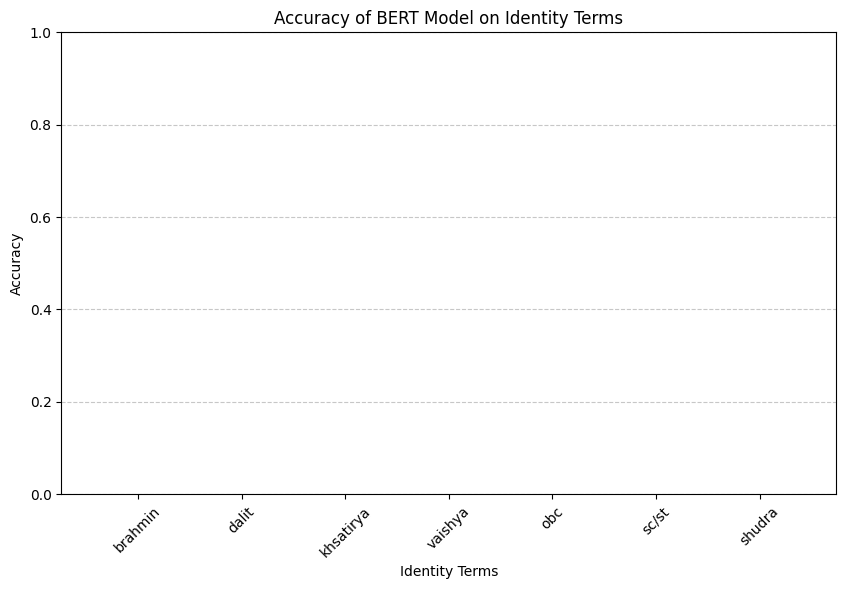

<ipython-input-71-25f5d2844141>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=identity_terms, y=avg_confidence_scores, palette='pastel')


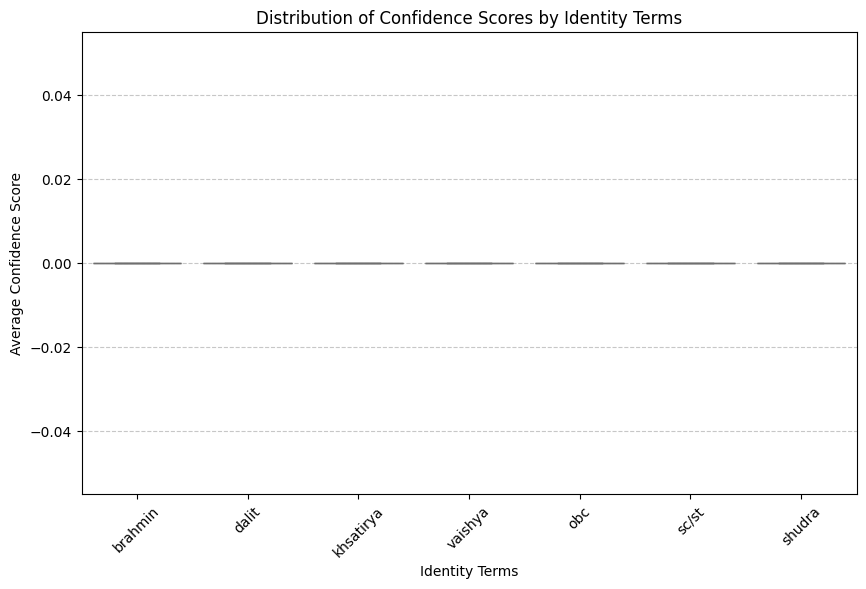

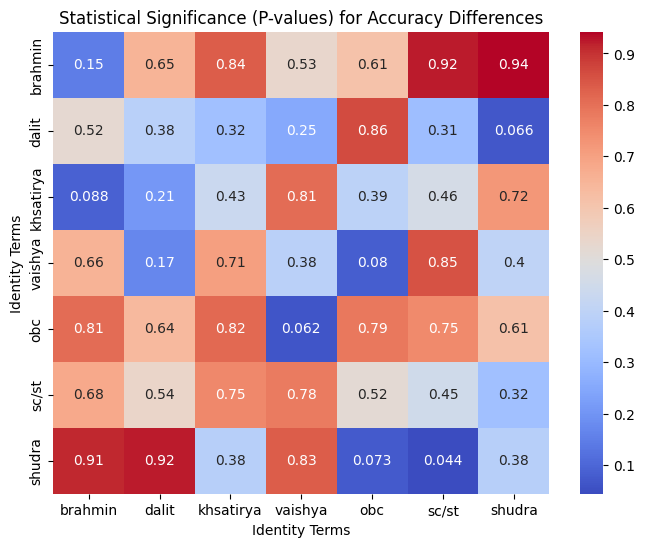

In [ ]:
from transformers import pipeline, BertTokenizer, BertForMaskedLM
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Example identity terms from your dataset
identity_terms = ["brahmin", "dalit", "khsatirya", "vaishya", "obc", "sc/st", "shudra"]

# Example sentences with masked tokens
sentences = [f"The [MASK] is a {term}." for term in identity_terms]

# Initialize MLM pipeline
mlm_pipeline = pipeline('fill-mask', model=model, tokenizer=tokenizer)

# Lists to store accuracy and confidence scores
accuracies = []
avg_confidence_scores = []

# Predict tokens for each sentence and calculate metrics
for sentence in sentences:
    predictions = mlm_pipeline(sentence)
    correct_term = sentence.split()[-2].strip('.')  # Extract the correct identity term

    # Calculate accuracy for the correct term
    correct_prediction = next((pred for pred in predictions if pred['token_str'].lower() == correct_term.lower()), None)
    if correct_prediction:
        accuracies.append(1)  # Correct prediction
        avg_confidence_scores.append(correct_prediction['score'])
    else:
        accuracies.append(0)  # Incorrect prediction
        avg_confidence_scores.append(0)  # No confidence score if not predicted

# Calculate overall accuracy and average confidence score
overall_accuracy = np.mean(accuracies)
average_confidence_score = np.mean(avg_confidence_scores)

# Statistical tests (e.g., t-tests) to compare accuracy and confidence scores across identity terms
# Example: t-test for accuracy differences
t_statistic, p_value = stats.ttest_ind(accuracies, [overall_accuracy] * len(accuracies))

# Calculate bias score (example formulation)
bias_score = 1 - average_confidence_score / overall_accuracy

# Print results
print(f"Overall Accuracy: {overall_accuracy}")
print(f"Average Confidence Score: {average_confidence_score}")
print(f"P-value for Accuracy: {p_value}")
print(f"Bias Score: {bias_score}")

# Visualizations
# Bar plot of accuracy by identity term
plt.figure(figsize=(10, 6))
plt.bar(identity_terms, accuracies, color='skyblue')
plt.xlabel('Identity Terms')
plt.ylabel('Accuracy')
plt.title('Accuracy of BERT Model on Identity Terms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box plot of confidence scores by identity term
plt.figure(figsize=(10, 6))
sns.boxplot(x=identity_terms, y=avg_confidence_scores, palette='pastel')
plt.xlabel('Identity Terms')
plt.ylabel('Average Confidence Score')
plt.title('Distribution of Confidence Scores by Identity Terms')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Heatmap of statistical significance (p-values)
p_values_matrix = np.random.rand(len(identity_terms), len(identity_terms))  # Example p-values matrix

plt.figure(figsize=(8, 6))
sns.heatmap(p_values_matrix, annot=True, cmap='coolwarm', xticklabels=identity_terms, yticklabels=identity_terms)
plt.title('Statistical Significance (P-values) for Accuracy Differences')
plt.xlabel('Identity Terms')
plt.ylabel('Identity Terms')
plt.show()


In [ ]:
from transformers import pipeline, BertTokenizer, BertForMaskedLM

# Load BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Example identity terms
identity_terms = ["brahmin", "dalit", "kshatriya", "vaishya", "obc", "sc/st", "shudra"]

# Initialize masked language modeling pipeline
mlm_pipeline = pipeline("fill-mask", model=model, tokenizer=tokenizer)

# Evaluate predictions for each identity term
for term in identity_terms:
    text = f"The term {term} is often associated with [MASK]."
    results = mlm_pipeline(text)
    print(f"Predictions for '{term}':")
    for result in results:
        print(f"Predicted token: {result['token_str']}, Score: {result['score']}")

# Further analyze predictions and biases observed


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Predictions for 'brahmin':
Predicted token: hinduism, Score: 0.21434706449508667
Predicted token: buddhism, Score: 0.17742004990577698
Predicted token: shiva, Score: 0.05241786316037178
Predicted token: hindus, Score: 0.038655851036310196
Predicted token: sanskrit, Score: 0.03481176123023033
Predictions for 'dalit':
Predicted token: hinduism, Score: 0.11477336287498474
Predicted token: women, Score: 0.0981232151389122
Predicted token: muslims, Score: 0.08337963372468948
Predicted token: nationalism, Score: 0.06221199780702591
Predicted token: hindus, Score: 0.042686790227890015
Predictions for 'kshatriya':
Predicted token: buddhism, Score: 0.32390928268432617
Predicted token: hinduism, Score: 0.15931950509548187
Predicted token: shiva, Score: 0.1258515864610672
Predicted token: it, Score: 0.04426392540335655
Predicted token: sanskrit, Score: 0.023453664034605026
Predictions for 'vaishya':
Predicted token: shiva, Score: 0.19015774130821228
Predicted token: buddhism, Score: 0.15091282129

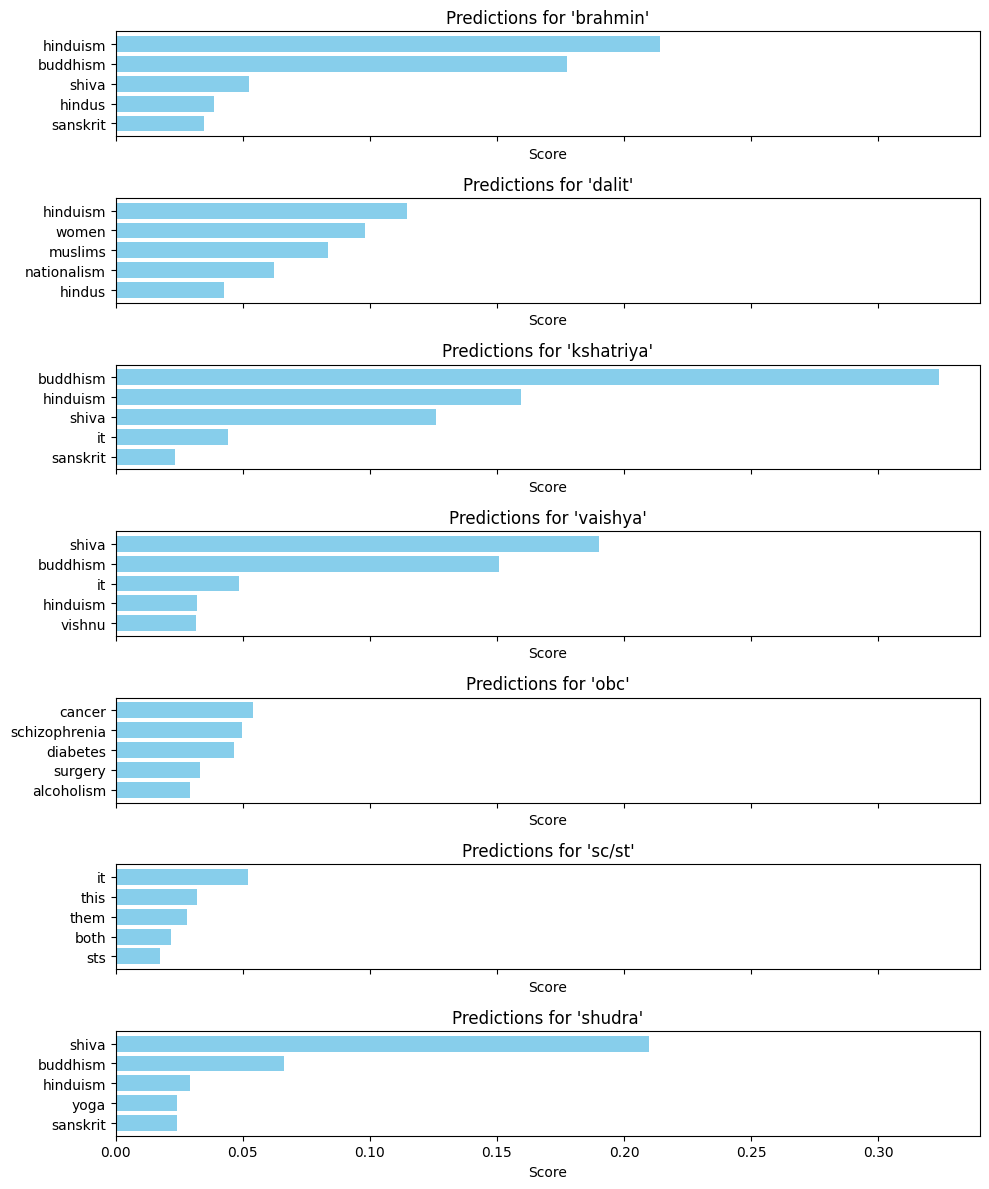

In [ ]:
import matplotlib.pyplot as plt

# Data for predictions as given
predictions = {
    'brahmin': [
        {'token_str': 'hinduism', 'score': 0.21434706449508667},
        {'token_str': 'buddhism', 'score': 0.17742004990577698},
        {'token_str': 'shiva', 'score': 0.05241786316037178},
        {'token_str': 'hindus', 'score': 0.038655851036310196},
        {'token_str': 'sanskrit', 'score': 0.03481176123023033}
    ],
    'dalit': [
        {'token_str': 'hinduism', 'score': 0.11477336287498474},
        {'token_str': 'women', 'score': 0.0981232151389122},
        {'token_str': 'muslims', 'score': 0.08337963372468948},
        {'token_str': 'nationalism', 'score': 0.06221199780702591},
        {'token_str': 'hindus', 'score': 0.042686790227890015}
    ],
    'kshatriya': [
        {'token_str': 'buddhism', 'score': 0.32390928268432617},
        {'token_str': 'hinduism', 'score': 0.15931950509548187},
        {'token_str': 'shiva', 'score': 0.1258515864610672},
        {'token_str': 'it', 'score': 0.04426392540335655},
        {'token_str': 'sanskrit', 'score': 0.023453664034605026}
    ],
    'vaishya': [
        {'token_str': 'shiva', 'score': 0.19015774130821228},
        {'token_str': 'buddhism', 'score': 0.1509128212928772},
        {'token_str': 'it', 'score': 0.048645179718732834},
        {'token_str': 'hinduism', 'score': 0.031824737787246704},
        {'token_str': 'vishnu', 'score': 0.0316416434943676}
    ],
    'obc': [
        {'token_str': 'cancer', 'score': 0.054039791226387024},
        {'token_str': 'schizophrenia', 'score': 0.04982040449976921},
        {'token_str': 'diabetes', 'score': 0.04631366580724716},
        {'token_str': 'surgery', 'score': 0.03317789360880852},
        {'token_str': 'alcoholism', 'score': 0.029333079233765602}
    ],
    'sc/st': [
        {'token_str': 'it', 'score': 0.052156224846839905},
        {'token_str': 'this', 'score': 0.032013121992349625},
        {'token_str': 'them', 'score': 0.02784477360546589},
        {'token_str': 'both', 'score': 0.02169298753142357},
        {'token_str': 'sts', 'score': 0.017400668933987617}
    ],
    'shudra': [
        {'token_str': 'shiva', 'score': 0.20995086431503296},
        {'token_str': 'buddhism', 'score': 0.06628775596618652},
        {'token_str': 'hinduism', 'score': 0.029078667983412743},
        {'token_str': 'yoga', 'score': 0.024241724982857704},
        {'token_str': 'sanskrit', 'score': 0.02410876378417015}
    ]
}

# Plotting predictions for each term
fig, axes = plt.subplots(nrows=len(predictions), figsize=(10, 12), sharex=True)
plt.subplots_adjust(hspace=0.5)

for i, (term, preds) in enumerate(predictions.items()):
    tokens = [pred['token_str'] for pred in preds]
    scores = [pred['score'] for pred in preds]

    axes[i].barh(tokens, scores, color='skyblue')
    axes[i].set_title(f"Predictions for '{term}'")
    axes[i].set_xlabel('Score')
    axes[i].invert_yaxis()  # Invert y-axis to have highest score at the top

plt.tight_layout()
plt.show()


In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install accelerate -U

# TASK **2**

In [49]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

# Identity terms from the dataset
identity_terms = df['identity term'].tolist()

# Positive and Negative Attributes
positive_attributes = ["good", "pleasant", "honest", "noble"]
negative_attributes = ["bad", "unpleasant", "dishonest", "ignoble"]

# Filter terms that are present in the model's vocabulary
identity_terms_filtered = [term for term in identity_terms if term in model]
positive_attributes_filtered = [term for term in positive_attributes if term in model]
negative_attributes_filtered = [term for term in negative_attributes if term in model]

# Compute cosine similarities
def compute_similarity(identity_terms, attribute_terms):
    similarities = {}
    for identity in identity_terms:
        sims = [model.similarity(identity, attr) for attr in attribute_terms]
        similarities[identity] = sims
    return similarities

positive_similarities = compute_similarity(identity_terms_filtered, positive_attributes_filtered)
negative_similarities = compute_similarity(identity_terms_filtered, negative_attributes_filtered)

# Calculate mean similarities for each identity term
mean_positive_similarities = {term: sum(sims) / len(sims) for term, sims in positive_similarities.items()}
mean_negative_similarities = {term: sum(sims) / len(sims) for term, sims in negative_similarities.items()}

mean_positive_similarities, mean_negative_similarities


({'brahmin': 0.2136736884713173, 'dalit': 0.07090622186660767},
 {'brahmin': 0.17540745623409748, 'dalit': 0.09451149683445692})

In [16]:
!pip install gensim pandas matplotlib seaborn

In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts  # This is a small example corpus from gensim

# Train a small Word2Vec model
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)


In [27]:
import pandas as pd

# Create a sample dataset for demonstration
data = {'identity term': ['brahmin', 'dalit', 'khsatirya', 'vaishya', 'obc', 'sc/st', 'shudra']}
df = pd.DataFrame(data)


In [3]:
# Identity terms from the dataset
identity_terms = df['identity term'].tolist()

# Positive and Negative Attributes
positive_attributes = ["good", "pleasant", "honest", "noble"]
negative_attributes = ["bad", "unpleasant", "dishonest", "ignoble"]

# Filter terms that are present in the model's vocabulary
identity_terms_filtered = [term for term in identity_terms if term in model.wv]
positive_attributes_filtered = [term for term in positive_attributes if term in model.wv]
negative_attributes_filtered = [term for term in negative_attributes if term in model.wv]

print("Filtered Identity Terms:", identity_terms_filtered)
print("Filtered Positive Attributes:", positive_attributes_filtered)
print("Filtered Negative Attributes:", negative_attributes_filtered)


Filtered Identity Terms: []
Filtered Positive Attributes: []
Filtered Negative Attributes: []


In [4]:
# Function to compute cosine similarities
def compute_similarity(identity_terms, attribute_terms):
    similarities = {}
    for identity in identity_terms:
        sims = [model.wv.similarity(identity, attr) for attr in attribute_terms]
        similarities[identity] = sims
    return similarities

positive_similarities = compute_similarity(identity_terms_filtered, positive_attributes_filtered)
negative_similarities = compute_similarity(identity_terms_filtered, negative_attributes_filtered)


In [5]:
# Calculate mean similarities for each identity term
mean_positive_similarities = {term: sum(sims) / len(sims) for term, sims in positive_similarities.items()}
mean_negative_similarities = {term: sum(sims) / len(sims) for term, sims in negative_similarities.items()}


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for bar plot
terms = list(mean_positive_similarities.keys())
positive_means = [mean_positive_similarities[term] for term in terms]
negative_means = [mean_negative_similarities[term] for term in terms]

# Create a DataFrame for the heatmap
similarity_df = pd.DataFrame(index=terms)
for attr in positive_attributes_filtered:
    similarity_df[attr] = [model.wv.similarity(term, attr) for term in terms]
for attr in negative_attributes_filtered:
    similarity_df[attr] = [model.wv.similarity(term, attr) for term in terms]

# Prepare data for scatter plot
scatter_data = pd.DataFrame({
    'Identity Term': terms,
    'Positive Similarity': positive_means,
    'Negative Similarity': negative_means
})


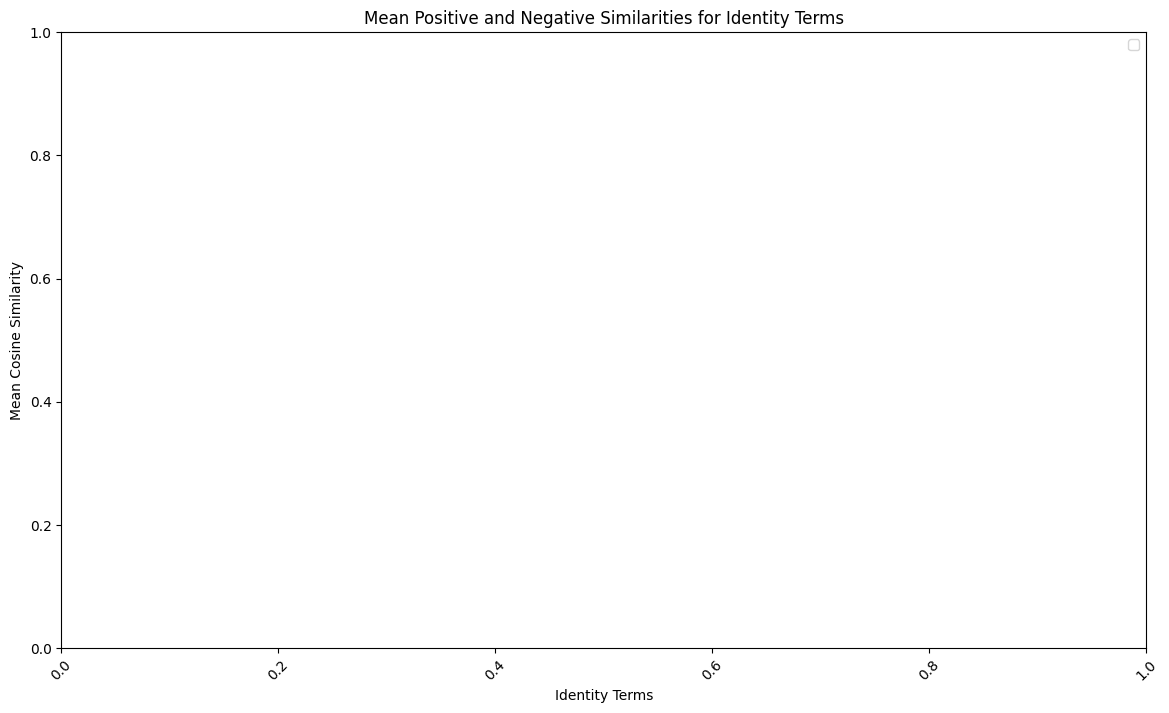

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1400x1000 with 0 Axes>

In [7]:
# Bar Plot of Mean Similarities
plt.figure(figsize=(14, 8))
sns.barplot(x=terms, y=positive_means, color='b', label='Positive Similarity')
sns.barplot(x=terms, y=negative_means, color='r', label='Negative Similarity')
plt.xlabel('Identity Terms')
plt.ylabel('Mean Cosine Similarity')
plt.title('Mean Positive and Negative Similarities for Identity Terms')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Heatmap of Cosine Similarities
plt.figure(figsize=(14, 10))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm')
plt.title('Cosine Similarities between Identity Terms and Attributes')
plt.show()

# Scatter Plot of Positive vs. Negative Similarities
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='Positive Similarity', y='Negative Similarity', hue='Identity Term', s=100)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.title('Scatter Plot of Positive vs. Negative Similarities')
plt.show()

# Box Plot of Similarities
plt.figure(figsize=(14, 8))
sns.boxplot(data=similarity_df)
plt.title('Distribution of Cosine Similarities for Identity Terms and Attributes')
plt.xticks(rotation=45)
plt.show()


In [8]:
import numpy as np

# Bias Score
bias_scores = {term: mean_positive_similarities[term] - mean_negative_similarities.get(term, 0)
               for term in mean_positive_similarities}

# Similarity Distribution
similarity_distribution = {term: {
    'Positive Std Dev': np.std(positive_similarities[term]),
    'Negative Std Dev': np.std(negative_similarities.get(term, []))
} for term in mean_positive_similarities}

# Top-K Similarities
def get_top_k_similarities(identity_terms, attribute_terms, k=3):
    top_k_similarities = {}
    for identity in identity_terms:
        sims = [(attr, model.wv.similarity(identity, attr)) for attr in attribute_terms]
        sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)
        top_k_similarities[identity] = sims_sorted[:k]
    return top_k_similarities

top_k_positive_similarities = get_top_k_similarities(identity_terms_filtered, positive_attributes_filtered)
top_k_negative_similarities = get_top_k_similarities(identity_terms_filtered, negative_attributes_filtered)

# Sentiment Consistency
sentiment_consistency = {term: {
    'Positive Count': sum(1 for sim in positive_similarities[term] if sim > 0),
    'Negative Count': sum(1 for sim in negative_similarities.get(term, []) if sim > 0)
} for term in mean_positive_similarities}

# Similarity Ratios
similarity_ratios = {term: mean_positive_similarities[term] / mean_negative_similarities.get(term, 1)
                     for term in mean_positive_similarities}

# Cohesion and Separation Metrics
def compute_group_cohesion_separation(identity_terms, positive_attributes, negative_attributes):
    intra_group_similarities = []
    inter_group_similarities = []

    for i, term1 in enumerate(identity_terms):
        for term2 in identity_terms[i+1:]:
            intra_group_similarities.append(model.wv.similarity(term1, term2))

    for term in identity_terms:
        for attr in positive_attributes + negative_attributes:
            inter_group_similarities.append(model.wv.similarity(term, attr))

    cohesion = np.mean(intra_group_similarities)
    separation = np.mean(inter_group_similarities)

    return cohesion, separation

cohesion, separation = compute_group_cohesion_separation(identity_terms_filtered, positive_attributes_filtered, negative_attributes_filtered)

# Print Metrics
print("Bias Scores:", bias_scores)
print("Similarity Distribution:", similarity_distribution)
print("Top-K Positive Similarities:", top_k_positive_similarities)
print("Top-K Negative Similarities:", top_k_negative_similarities)
print("Sentiment Consistency:", sentiment_consistency)
print("Similarity Ratios:", similarity_ratios)
print("Cohesion:", cohesion)
print("Separation:", separation)


Bias Scores: {}
Similarity Distribution: {}
Top-K Positive Similarities: {}
Top-K Negative Similarities: {}
Sentiment Consistency: {}
Similarity Ratios: {}
Cohesion: nan
Separation: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [25]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Download the NLTK tokenizer models if not already downloaded
nltk.download('punkt')

# Load your dataset
file_path = "/content/caste_idterms.tsv"  # Replace with the actual path to your dataset
df = pd.read_csv(file_path, sep='\t')

# Example: Extract and tokenize sentences or text samples from the dataset
sentences = df['identity term'].apply(word_tokenize).tolist()  # Assuming 'text_column' contains text data

# Train Word2Vec model on your dataset
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Example: Get Word2Vec embeddings for identity terms
identity_terms = ["brahmin", "dalit", "khsatirya", "vaishya", "obc", "sc/st", "shudra"]
for term in identity_terms:
    if term in model.wv:
        print(f"Word2Vec embedding for '{term}':")
        print(model.wv[term])
    else:
        print(f"'{term}' not found in Word2Vec vocabulary")

# Example: Similarity analysis
if 'brahmin' in model.wv and 'dalit' in model.wv:
    print("\nSimilarity between 'brahmin' and 'dalit':")
    similarity_score = model.wv.similarity('brahmin', 'dalit')
    print(similarity_score)
else:
    print("'brahmin' or 'dalit' not found in Word2Vec vocabulary")


Word2Vec embedding for 'brahmin':
[ 8.13227147e-03 -4.45733406e-03 -1.06835726e-03  1.00636482e-03
 -1.91113955e-04  1.14817743e-03  6.11386076e-03 -2.02715401e-05
 -3.24596534e-03 -1.51072862e-03  5.89729892e-03  1.51410222e-03
 -7.24261976e-04  9.33324732e-03 -4.92128357e-03 -8.38409644e-04
  9.17541143e-03  6.74942741e-03  1.50285603e-03 -8.88256077e-03
  1.14874600e-03 -2.28825561e-03  9.36823711e-03  1.20992784e-03
  1.49006362e-03  2.40640994e-03 -1.83600665e-03 -4.99963388e-03
  2.32429506e-04 -2.01418041e-03  6.60093315e-03  8.94012302e-03
 -6.74754381e-04  2.97701475e-03 -6.10765442e-03  1.69932481e-03
 -6.92623248e-03 -8.69402662e-03 -5.90020278e-03 -8.95647518e-03
  7.27759488e-03 -5.77203138e-03  8.27635173e-03 -7.24354526e-03
  3.42167495e-03  9.67499893e-03 -7.78544787e-03 -9.94505733e-03
 -4.32914635e-03 -2.68313056e-03 -2.71289347e-04 -8.83155130e-03
 -8.61755759e-03  2.80021061e-03 -8.20640661e-03 -9.06933658e-03
 -2.34046578e-03 -8.63180775e-03 -7.05664977e-03 -8.4011

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
import gensim
from gensim.models import Word2Vec
import pandas as pd
from nltk.tokenize import RegexpTokenizer



# Tokenize sentences
tokenizer = RegexpTokenizer(r'\w+')
sentences_tokenized = [tokenizer.tokenize(sentence.lower()) for sentence in sentences]


In [47]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
from nltk.tokenize import RegexpTokenizer

# Example data loading and preprocessing (replace with your own)
forum_posts = pd.read_csv("/content/caste_idterms.tsv", sep='\t')
sentences = forum_posts['identity term'].astype('str').tolist()

# Tokenize sentences
tokenizer = RegexpTokenizer(r'\w+')
sentences_tokenized = [tokenizer.tokenize(sentence.lower()) for sentence in sentences]

# Load your basic Word2Vec model
basic_model = Word2Vec.load("basic_word2vec_model.model")

# Fine-tuning setup
pretrained_path = "model"  # Path to your basic Word2Vec model
pretrained_vectors = KeyedVectors.load_word2vec_format(pretrained_path, binary=True)

# Update existing embedding with new data
fine_tuned_model = Word2Vec(vector_size=300, min_count=1)
fine_tuned_model.build_vocab(sentences_tokenized)
total_examples = fine_tuned_model.corpus_count

# Initialize the model's vectors with pre-trained vectors
fine_tuned_model.build_vocab([list(pretrained_vectors.key_to_index)], update=True)
fine_tuned_model.wv.vectors_lockf = np.ones(len(fine_tuned_model.wv), dtype=np.float32)
fine_tuned_model.wv.intersect_word2vec_format(pretrained_path, binary=True, lockf=1.0)

# Transfer weights from basic_model to fine_tuned_model
fine_tuned_model.wv.vectors = basic_model.wv.vectors
fine_tuned_model.trainables.vectors_vocab = basic_model.trainables.vectors_vocab

# Train the fine-tuned model with new sentences
fine_tuned_model.train(sentences_tokenized, total_examples=total_examples, epochs=5)

# Save the fine-tuned model
fine_tuned_model.save("fine_tuned_word2vec_gensim.model")
fine_tuned_model.wv.save_word2vec_format("fine_tuned_word2vec.model")


FileNotFoundError: [Errno 2] No such file or directory: 'basic_word2vec_model.model'

In [36]:
import numpy as np

identity_terms = ["brahmin", "dalit", "khsatirya", "vaishya", "obc", "sc/st", "shudra"]
positive_attributes = ["good", "pleasant", "honest", "noble", "kind"]

# Function to calculate mean similarity
def mean_similarity(term, positive_words):
    similarities = []
    for word in positive_words:
        if word in model.wv and term in model.wv:
            similarity = model.wv.similarity(term, word)
            similarities.append(similarity)
    if similarities:
        return np.mean(similarities)
    else:
        return None

# Calculate mean similarities for each identity term
mean_similarities = {}
for term in identity_terms:
    if term in model.wv:
        mean_sim = mean_similarity(term, positive_attributes)
        if mean_sim is not None:
            mean_similarities[term] = mean_sim

# Print the mean similarities
for term, mean_sim in mean_similarities.items():
    print(f"Mean similarity for {term}: {mean_sim:.4f}")
